<a href="https://colab.research.google.com/github/oshvil2020/MachineLearning-Penguins/blob/main/PenguinsML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [42]:
penguins = sns.load_dataset("penguins")

In [43]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


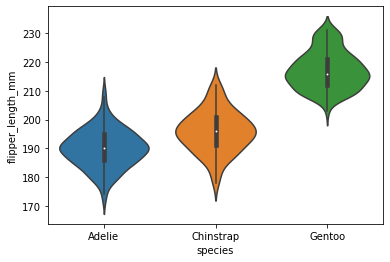

In [44]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=penguins,size=8)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


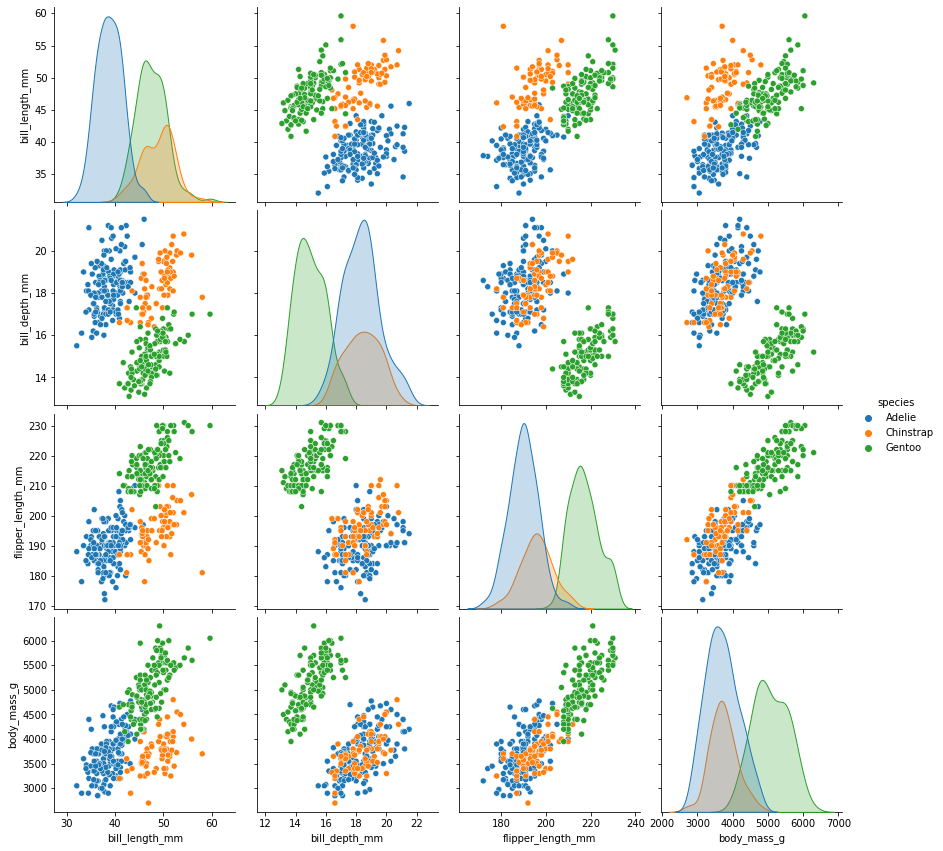

In [5]:
sns.pairplot(penguins, hue="species", size=3, diag_kind="kde");

# Labels for species

In [47]:
penguins.dropna(inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [46]:
le = LabelEncoder()
penguins['species'] = le.fit_transform(penguins['species'].astype(str))
penguins['sex'] = le.fit_transform(penguins['sex'].astype(str))

In [48]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,1
1,0,Torgersen,39.5,17.4,186.0,3800.0,0
2,0,Torgersen,40.3,18.0,195.0,3250.0,0
4,0,Torgersen,36.7,19.3,193.0,3450.0,0
5,0,Torgersen,39.3,20.6,190.0,3650.0,1


# Split Train and Test variables

In [49]:
y= penguins['species']
x = penguins.drop(['species','island'],axis=1)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

In [51]:
from sklearn.metrics import classification_report, accuracy_score

#KNN

## KNN n_neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN1 = KNeighborsClassifier(n_neighbors=40)
modelKNN1.fit(X_train,y_train)

y_predKN1 = modelKNN1.predict(X_test)
print( classification_report(y_test,y_predKN1))
Y_KN1 = accuracy_score(y_test,y_predKN1)


              precision    recall  f1-score   support

           0       0.69      0.89      0.77        54
           1       0.00      0.00      0.00        20
           2       0.84      0.92      0.88        39

   micro avg       0.74      0.74      0.74       113
   macro avg       0.51      0.60      0.55       113
weighted avg       0.62      0.74      0.67       113



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## KNN raduis

In [75]:
from sklearn.neighbors import RadiusNeighborsClassifier
modelKN2 = RadiusNeighborsClassifier(radius=52)
modelKN2.fit(X_train,y_train)

y_predKN2 = modelKN2.predict(X_test)
print(classification_report(y_test,y_predKN2))
Y_KN2 = accuracy_score(y_test,y_predKN2)


              precision    recall  f1-score   support

           0       0.74      0.89      0.81        54
           1       0.60      0.15      0.24        20
           2       0.88      0.97      0.93        39

   micro avg       0.79      0.79      0.79       113
   macro avg       0.74      0.67      0.66       113
weighted avg       0.76      0.79      0.75       113



# DecsionTree

In [57]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train,y_train)

y_predDT = modelDT.predict(X_test)
print( classification_report(y_test,y_predDT))
Y_DT = accuracy_score(y_test,y_predDT)



              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.83      1.00      0.91        20
           2       0.97      1.00      0.99        39

   micro avg       0.96      0.96      0.96       113
   macro avg       0.94      0.97      0.95       113
weighted avg       0.96      0.96      0.96       113



# DecisionTree Graph

In [ ]:
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz


In [ ]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [ ]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

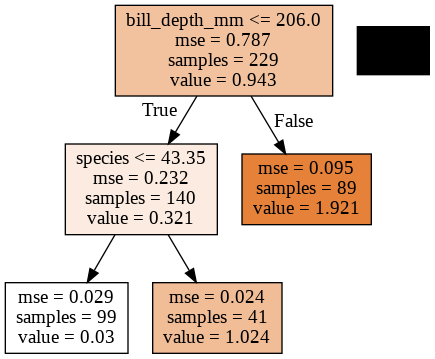

In [ ]:
graph, = print_tree(regr, features=['species', 'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g	sex'])
Image(graph.create_png())

# Random Forest

## Random Forest max_depth

In [58]:
from sklearn.ensemble import RandomForestClassifier
modelRF1 = RandomForestClassifier(max_depth=2)
modelRF1.fit(X_train,y_train)

y_predRF1 = modelRF1.predict(X_test)
print(classification_report(y_test,y_predRF1))

Y_RF1= accuracy_score(y_test,y_predRF1)



              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.86      0.90      0.88        20
           2       1.00      1.00      1.00        39

   micro avg       0.96      0.96      0.96       113
   macro avg       0.94      0.95      0.94       113
weighted avg       0.96      0.96      0.96       113



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Random Forest n_estimators


In [59]:
from sklearn.ensemble import RandomForestClassifier
modelRF2 = RandomForestClassifier(n_estimators= 30)
modelRF2.fit(X_train,y_train)

y_predRF2 = modelRF2.predict(X_test)
print(classification_report(y_test,y_predRF2))
Y_RF2 = accuracy_score(y_test,y_predRF2)


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.83      1.00      0.91        20
           2       1.00      1.00      1.00        39

   micro avg       0.96      0.96      0.96       113
   macro avg       0.94      0.98      0.96       113
weighted avg       0.97      0.96      0.97       113



In [60]:
from sklearn.ensemble import RandomForestClassifier
modelRF3 = RandomForestClassifier(n_estimators= 30, min_samples_split=2)
modelRF3.fit(X_train,y_train)

y_predRF3 = modelRF3.predict(X_test)
print(classification_report(y_test,y_predRF3))
Y_RE3 = accuracy_score(y_test,y_predRF3)


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.83      1.00      0.91        20
           2       1.00      1.00      1.00        39

   micro avg       0.96      0.96      0.96       113
   macro avg       0.94      0.98      0.96       113
weighted avg       0.97      0.96      0.97       113



# SVM

## SVM kernel = linear

In [79]:
from sklearn.svm import SVC

modelsvm1 = SVC(kernel = 'linear')
modelsvm1.fit(X_train,y_train)

y_predSV1 = modelsvm1.predict(X_test)
print(classification_report(y_test,y_predSV1))
Y_SV1 = accuracy_score(y_test,y_predSV1)
Y_SV1

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        39

   micro avg       0.99      0.99      0.99       113
   macro avg       0.98      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



0.9911504424778761

## SVM kernel = rbf

In [78]:
from sklearn.svm import SVC

modelsvm2 = SVC(kernel = 'rbf')
modelsvm2.fit(X_train,y_train)

y_predSV2 = modelsvm2.predict(X_test)
print(classification_report(y_test,y_predSV2))
Y_SV2 = accuracy_score(y_test,y_predSV2)

Y_SV2

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        54
           1       1.00      0.10      0.18        20
           2       1.00      0.33      0.50        39

   micro avg       0.61      0.61      0.61       113
   macro avg       0.85      0.48      0.46       113
weighted avg       0.79      0.61      0.54       113



/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6106194690265486

## SVM kernel = sigmoid

In [77]:
from sklearn.svm import SVC

modelsvm3 = SVC(kernel = 'sigmoid')
modelsvm3.fit(X_train,y_train)

y_predSV3 = modelsvm3.predict(X_test)
print(classification_report(y_test,y_predSV3))
Y_SV3 = accuracy_score(y_test,y_predSV3)

Y_SV3


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        54
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        39

   micro avg       0.48      0.48      0.48       113
   macro avg       0.16      0.33      0.22       113
weighted avg       0.23      0.48      0.31       113



/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4778761061946903

## SVM kernel = poly

In [76]:
from sklearn.svm import SVC

modelsvm4 = SVC(kernel = 'poly')
modelsvm4.fit(X_train,y_train)

y_predSV4 = modelsvm4.predict(X_test)
print(classification_report(y_test,y_predSV4))
Y_SV4 = accuracy_score(y_test,y_predSV4)
Y_SV4


/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        39

   micro avg       1.00      1.00      1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



1.0

# Naive Bayes

## NB Gaussian 

In [65]:
from sklearn.naive_bayes import GaussianNB

modelNB1 = GaussianNB()
modelNB1.fit(X_train,y_train)

y_predNB1 = modelNB1.predict(X_test)
Y_NB1 = accuracy_score(y_test,y_predNB1)

print(classification_report(y_test,y_predNB1))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.82      0.90      0.86        20
           2       1.00      1.00      1.00        39

   micro avg       0.95      0.95      0.95       113
   macro avg       0.93      0.94      0.93       113
weighted avg       0.95      0.95      0.95       113



## NB Multinomial

In [66]:
from sklearn.naive_bayes import MultinomialNB

modelNB = MultinomialNB(alpha=1.0,fit_prior=True)
modelNB.fit(X_train,y_train)

y_predNB2 = modelNB.predict(X_test)
Y_NB2 = accuracy_score(y_test,y_predNB2)

print(classification_report(y_test,y_predNB2))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        54
           1       0.77      0.85      0.81        20
           2       0.84      0.95      0.89        39

   micro avg       0.85      0.85      0.85       113
   macro avg       0.84      0.86      0.84       113
weighted avg       0.85      0.85      0.85       113



matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

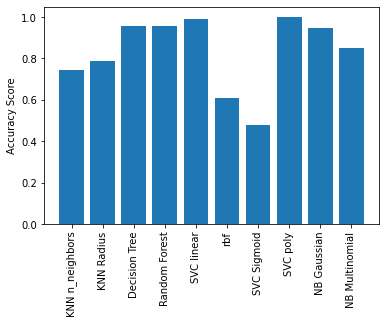

In [89]:

x=['KNN n_neighbors','KNN Radius','Decision Tree','Random Forest','SVC linear', 'rbf' , 'SVC Sigmoid' , 'SVC poly','NB Gaussian' , 'NB Multinomial']
height = [Y_KN1, Y_KN2, Y_DT, Y_RF1, Y_SV1, Y_SV2 , Y_SV3 , Y_SV4, Y_NB1 , Y_NB2]
plt.bar(x, height)#, width=0.8), bottom=None, *, align='center', data=None, **kwargs)
plt.ylabel('Accuracy Score')
plt.xticks(rotation = 90)